In [9]:
from pathlib import Path

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import mpltern

In [3]:
dss = {fp.stem: xr.open_dataset(fp) for fp in Path('~/scratch/coherence/uavsar').expanduser().glob('*_tau.nc')}

In [5]:
ds = dss['stlake_v3_tau']

In [98]:
sub = ds.isel(time1 = 0, time2 = 0).isel(heading = 0).sel(x = slice(-111.80, -1))

In [145]:
low_melt = sub['cor'].where(sub['model_melt'].sel(model_time = slice(sub.time1, sub.time2)).sum(['model_time']) < 0.01)
high_melt = sub['cor'].where(sub['model_melt'].sel(model_time = slice(sub.time1, sub.time2)).sum(['model_time']) > 0.06)

In [146]:
low_vv = low_melt.sel(pol = 'VV').values.ravel()
low_vh = low_melt.sel(pol = 'VH').values.ravel()
low_hh = low_melt.sel(pol = 'HH').values.ravel()

high_vv = high_melt.sel(pol = 'VV').values.ravel()
high_vh = high_melt.sel(pol = 'VH').values.ravel()
high_hh = high_melt.sel(pol = 'HH').values.ravel()

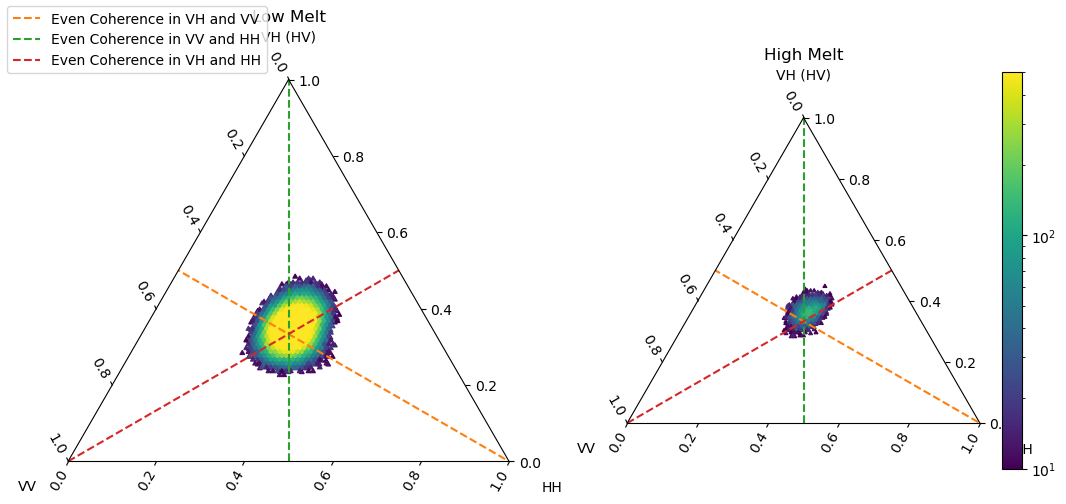

In [171]:
np.random.seed(seed=19)
t0, l0, r0 = np.random.dirichlet(alpha=(2.0, 2.0, 2.0), size=100).T

fig = plt.figure(figsize=(10.8, 4.8))
fig.subplots_adjust(left=0.075, right=0.85, wspace=0.3)

ax1 = fig.add_subplot(1, 2, 1, projection="ternary")
pc1 = ax1.tribin(low_vv, low_vh, low_hh, mincnt = 10, bins='log', vmin = 10, vmax = 500)

ax2 = fig.add_subplot(1, 2, 2, projection="ternary")
pc2 = ax2.tribin(high_vv, high_vh, high_hh, mincnt = 10, bins='log', vmin = 10, vmax = 500) # , edgecolors="none"
plt.colorbar(pc2)

for i, ax in enumerate([ax1, ax2]):
    
    if i == 0: prefix = '_'
    else: prefix = ''

    ax.axline(
        [1.0, 1.0, 0.0],
        slope=[-0.2, -0.2, 0.1],
        color="C1", linestyle = 'dashed',
        label = f'{prefix}Even Coherence in VH and VV'
    )

    ax.axline(
        [0.0, 1.0, 1.0],
        slope=[0.1, -0.2, -0.2],
        color="C2", linestyle = 'dashed',
        label = f'{prefix}Even Coherence in VV and HH'
    )

    ax.axline(
        [1.0, 0.0, 1.0],
        slope=[-0.2, 0.1, -0.2],
        color="C3", linestyle = 'dashed',
        label = f'{prefix}Even Coherence in VH and HH'
    )

    ax.set_tlabel("VH (HV)")
    ax.set_llabel("VV")
    ax.set_rlabel("HH")

    ax.taxis.set_label_rotation_mode('horizontal')
    ax.laxis.set_label_rotation_mode('horizontal')
    ax.raxis.set_label_rotation_mode('horizontal')

    # ax.grid()

ax1.set_title('Low Melt')
ax2.set_title('High Melt')

fig.legend(loc = 'outside upper left')

plt.tight_layout()

In [29]:
t, l, r, entropies = get_shanon_entropies()


In [30]:
t

array([1.        , 0.98333333, 0.98333333, ..., 0.        , 0.        ,
       0.        ])

In [31]:
l

array([0.        , 0.01666667, 0.        , ..., 0.03333333, 0.01666667,
       0.        ])

In [32]:
r

array([0.        , 0.        , 0.01666667, ..., 0.96666667, 0.98333333,
       1.        ])

In [33]:
r

array([0.        , 0.        , 0.01666667, ..., 0.96666667, 0.98333333,
       1.        ])

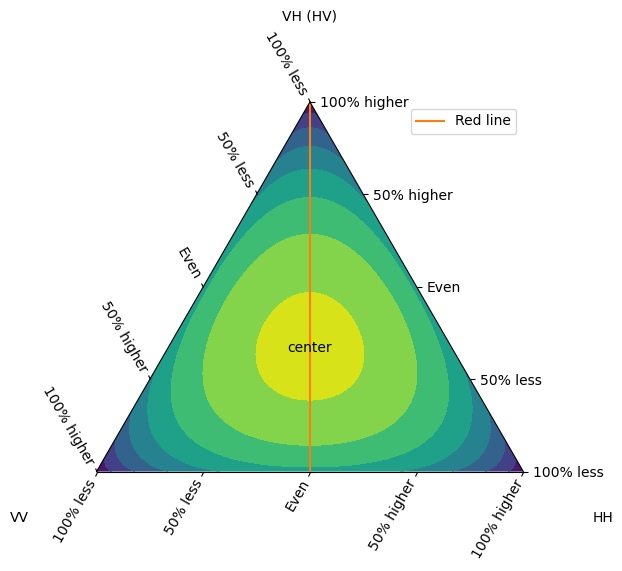

In [28]:
ax = plt.subplot(projection="ternary", ternary_sum=1.0)

ax.set_tlabel("VH (HV)")
ax.set_llabel("VV")
ax.set_rlabel("HH")

ax.taxis.set_label_rotation_mode('horizontal')
ax.laxis.set_label_rotation_mode('horizontal')
ax.raxis.set_label_rotation_mode('horizontal')

# ax.taxis.set_label_position('tick1')


from mpltern.datasets import get_shanon_entropies

# ax = plt.subplot(projection="ternary")

t, l, r, entropies = get_shanon_entropies()
# t: [ 0. 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.1 ...]
# l: [ 0. 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.  0.1 0.2 ...]
# r: [ 1. 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0.9 0.8 0.7 ...]
# v: [-0. 0.32508297  0.50040242  ...]
ax.tricontourf(t, l, r, entropies)

c = 1.0 / 3.0
ax.text(c, c, c, 'center', ha='center', va='center')

ax.axline(
    [1.0, 0.0, 0.0],
    slope=[-0.2, 0.1, 0.1],
    color="C1",
    label = 'Red line'
)

ax.legend()

ticks = [0.0, 0.25, 0.5, 0.75, 1]
labels = ["100% less", "50% less", "Even", "50% higher", "100% higher"]
ax.taxis.set_ticks(ticks, labels=labels)
ax.laxis.set_ticks(ticks, labels=labels)
ax.raxis.set_ticks(ticks, labels=labels)

plt.show()